# Spend Analytics Capstone Project

##### In this project, we will analyse and classify spend data for the procurement function of a poultry company. This will enable the company to identify scope of efficiency improvement and better strategic planning.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
#Data=pd.read_excel('SpendData.xlsx')
df_Spend1=pd.read_excel('/content/SpendData.xlsx')


In [3]:
# Viewing first 5 rows of the dataset

df_Spend1.head()

,Purch.Doc.,Line Items,Changed On,Short Text,Material,CoCd,Plnt,SLoc,TrackingNo,Matl Group,PO Quantity,OUn,OPU,Conv.,Eq. To,Net Price,Per,Net Value,Gross value,GRT,Overdel. Tol.,Underdel.Tol.,DCI,Category Information,Cns,P.A.Item Information,Agr. Cum. Qty,TOZ,BUn,Non-deductible,Quantity,Price Date,Cat,Effective value,PTm,Net Weight,Un,Special Stock Information,Profit Ctr,Gross Weight,Volume,Net value,Statistical Information,Object no.,Time of Transmission,Next Transmission Number,Doc. Item Information,RShLi,MTyp,NCM Code,Spec. Stk Valuation,Reb.basis,Requested By,Itm,Requirement Urgency,CRM Item No,Down Payment Amount,Priority (Material Required Within),Ordered By,Approved By,Priority,Section,Indenter ID,Input Tax Credit,Item Information B.D.
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,NaN,NaN,1310,1.0,EA,EA,1,1,4400.0,1,4400.0,4400.0,0,0,0,X,Q,P,0,0,0,EA,0.0,0,2018-03-24,F,0.0,0,0.0,NaN,Q,0000009110,0.0,0.0,0,NaN,0,00:00:00,1,0,0,YGEN,84369900,M,0.0,NaN,0,0,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969021.0,9000,9110,NaN,NaN,1310,1.0,EA,EA,1,1,6100.0,1,6100.0,6100.0,0,0,0,X,Q,P,0,0,0,EA,0.0,0,2018-03-24,F,0.0,0,0.0,NaN,Q,0000009110,0.0,0.0,0,NaN,0,00:00:00,1,0,1,YGEN,84369900,M,0.0,NaN,0,0,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815812.0,9000,9110,NaN,NaN,ASSETS,11.0,EA,EA,1,1,823472.0,1,9058192.0,9058192.0,0,0,0,X,Q,P,0,0,0,EA,0.0,0,2018-05-07,F,0.0,0,0.0,KG,Q,0000009110,0.0,0.0,0,NaN,0,00:00:00,1,0,1,YCGM,8704,M,9058192.0,NaN,0,0,0,0,0,54651,54680,NaN,0,54651,T3,0
3,1000007299,20,2018-09-29,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,11.0,EA,EA,1,0,10540.0,1,115940.0,115940.0,0,0,0,X,P,V,0,0,0,NaN,0.0,0,2018-05-07,F,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0,NaN,0,00:00:00,1,0,0,NaN,NaN,NaN,115940.0,NaN,0,0,0,0,0,0,0,NaN,0,0,T3,0
4,1000007299,30,2018-09-29,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,11.0,EA,EA,1,0,10000.0,1,110000.0,110000.0,0,0,0,NaN,P,V,0,0,0,NaN,0.0,0,2018-05-07,F,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0,NaN,0,00:00:00,1,0,0,NaN,NaN,NaN,110000.0,NaN,0,0,0,0,0,0,0,NaN,0,0,T3,0


In [4]:
# Checking size of the data

df_Spend1.shape

(151412, 65)

In [5]:
# Looking at data types for variables in the dataset

df_Spend1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 65 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Purch.Doc.                           151412 non-null  int64         
 1   Line Items                           151412 non-null  int64         
 2   Changed On                           151412 non-null  datetime64[ns]
 3   Short Text                           151412 non-null  object        
 4   Material                             148321 non-null  float64       
 5   CoCd                                 151412 non-null  int64         
 6   Plnt                                 151412 non-null  object        
 7   SLoc                                 119236 non-null  object        
 8   TrackingNo                           9205 non-null    object        
 9   Matl Group                           151412 non-null  object        
 

In [6]:
# Checking column/variable names in the dataset

df_Spend1.columns

Index(['Purch.Doc.', 'Line Items', 'Changed On', 'Short Text', 'Material',
       'CoCd', 'Plnt', 'SLoc', 'TrackingNo', 'Matl Group', 'PO Quantity',
       'OUn', 'OPU', 'Conv.', 'Eq. To', 'Net Price', 'Per', 'Net Value',
       'Gross value', 'GRT', 'Overdel. Tol.', 'Underdel.Tol.', 'DCI',
       'Category Information', 'Cns', 'P.A.Item Information', 'Agr. Cum. Qty',
       'TOZ', 'BUn', 'Non-deductible', 'Quantity', 'Price Date', 'Cat',
       'Effective value', 'PTm', 'Net Weight', 'Un',
       'Special Stock Information', 'Profit Ctr', 'Gross Weight', 'Volume',
       'Net value', 'Statistical Information', 'Object no.',
       'Time of Transmission', 'Next Transmission Number',
       'Doc. Item Information', 'RShLi', 'MTyp', 'NCM Code',
       'Spec. Stk Valuation', 'Reb.basis', 'Requested By', 'Itm',
       'Requirement Urgency', 'CRM  Item No', 'Down Payment Amount',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Priority', 'Section', 'Indent

In [7]:
# creating a data frame that stores counts of null values in each of the variables
df_Null = pd.DataFrame(df_Spend1.isnull().sum()/df_Spend1.shape[0] *100)

# checking type of data structure created
type(df_Null)
# sorting data frame df_Null in descending order to push all variables with a higher count of null values to the top
sorted_df_Null = df_Null.sort_values(by=[0], ascending = False)
sorted_df_Null


,0
Statistical Information,99.091882
Spec. Stk Valuation,97.580113
Special Stock Information,97.576150
Cns,95.528096
Category Information,95.528096
TrackingNo,93.920561
Requested By,91.834201
Priority,80.839696
Input Tax Credit,78.955433
Un,55.461918


*__Here we can clearly see that (  
Trackingno :-- 93.920561, Category Information  :--  95.528096, Cns :-- 95.528096, 
Un  :-- 55.461918, Special Stock Information :-- 97.576150, 
Statistical Information :-- 99.091882, Spec. Stk Valuation  :--  97.580113
, Requested By :-- 91.834201, Priority :-80.839696, Input Tax Credit :--78.955433  ) 
this all variable contain more than 50% null values so for now we can drop this many variables.__

In [8]:
df_Spend1.columns

Index(['Purch.Doc.', 'Line Items', 'Changed On', 'Short Text', 'Material',
       'CoCd', 'Plnt', 'SLoc', 'TrackingNo', 'Matl Group', 'PO Quantity',
       'OUn', 'OPU', 'Conv.', 'Eq. To', 'Net Price', 'Per', 'Net Value',
       'Gross value', 'GRT', 'Overdel. Tol.', 'Underdel.Tol.', 'DCI',
       'Category Information', 'Cns', 'P.A.Item Information', 'Agr. Cum. Qty',
       'TOZ', 'BUn', 'Non-deductible', 'Quantity', 'Price Date', 'Cat',
       'Effective value', 'PTm', 'Net Weight', 'Un',
       'Special Stock Information', 'Profit Ctr', 'Gross Weight', 'Volume',
       'Net value', 'Statistical Information', 'Object no.',
       'Time of Transmission', 'Next Transmission Number',
       'Doc. Item Information', 'RShLi', 'MTyp', 'NCM Code',
       'Spec. Stk Valuation', 'Reb.basis', 'Requested By', 'Itm',
       'Requirement Urgency', 'CRM  Item No', 'Down Payment Amount',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Priority', 'Section', 'Indent

In [9]:
df_Spend = df_Spend1.drop(['TrackingNo', 'Category Information', 'Cns', 'Un', 'Special Stock Information',
                       'Statistical Information', 'Spec. Stk Valuation', 'Requested By', 'Priority', 'Input Tax Credit'],axis=1)

In [10]:
df_Spend.shape

(151412, 55)

In [11]:
# To check unique values in each column
for i in df_Spend.columns:
    print({i:df_Spend[i].unique()})

{'Purch.Doc.': array([1000007270, 1000007299, 1000007320, ..., 9500017214, 9500017215,
       9500017220])}
{'Line Items': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550,   1, 112, 203])}
{'Changed On': array(['2018-03-24T00:00:00.000000000', '2018-09-29T00:00:00.000000000',
       '2018-12-07T00:00:00.000000000', '2019-04-05T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2018-08-07T00:00:00.000000000', '2018-10-05T00:00:00.000000000',
       '2018-10-08T00:00:00.000000000', '2018-07-27T00:00:00.000000000',
       '2018-09-27T00:00:00.000000000', '2018-10-09T00:00:00.000000000',
       '2018-10-14T00:00:00.000000000', '2018-09-12T00:00:00.000000000',
       '2018-10-04T00:00

In [12]:
print(df_Spend['Conv.'].value_counts())
print(df_Spend['GRT'].value_counts())
print(df_Spend['DCI'].value_counts())
print(df_Spend['Agr. Cum. Qty'].value_counts())
print(df_Spend['TOZ'].value_counts())
print(df_Spend['Quantity'].value_counts())
print(df_Spend['Cat'].value_counts())
print(df_Spend['PTm'].value_counts())
print(df_Spend['Net value'].value_counts())
print(df_Spend['Object no.'].value_counts())
print(df_Spend['Next Transmission Number'].value_counts())
print(df_Spend['Doc. Item Information'].value_counts())
print(df_Spend['Itm'].value_counts())
print(df_Spend['Requirement Urgency'].value_counts())
print(df_Spend['CRM  Item No'].value_counts())
print(df_Spend['Down Payment Amount'].value_counts())
print(df_Spend['Item Information B.D.'].value_counts())

1    151412
Name: Conv., dtype: int64
0    151412
Name: GRT, dtype: int64
X    136417
Name: DCI, dtype: int64
0    151412
Name: Agr. Cum. Qty, dtype: int64
0    151412
Name: TOZ, dtype: int64
0    151412
Name: Quantity, dtype: int64
F    151412
Name: Cat, dtype: int64
0      151200
100       212
Name: PTm, dtype: int64
0    151412
Name: Net value, dtype: int64
0    151412
Name: Object no., dtype: int64
1    151412
Name: Next Transmission Number, dtype: int64
0    151412
Name: Doc. Item Information, dtype: int64
0    151412
Name: Itm, dtype: int64
0    151412
Name: Requirement Urgency, dtype: int64
0    151412
Name: CRM  Item No, dtype: int64
0    151412
Name: Down Payment Amount, dtype: int64
0    151412
Name: Item Information B.D., dtype: int64


In [13]:
print(df_Spend['Eq. To'].value_counts())
print(df_Spend['Underdel.Tol.'].value_counts())
print(df_Spend['Volume'].value_counts())

1       148320
0         3091
1250         1
Name: Eq. To, dtype: int64
0     150123
5       1199
1         37
30        27
10        20
2          6
Name: Underdel.Tol., dtype: int64
0.00     151359
0.97         39
1.00          5
0.50          4
20.00         3
5.00          2
Name: Volume, dtype: int64


In [14]:
df_Spend = df_Spend.drop(['Section','Conv.', 'GRT', 'DCI', 'Agr. Cum. Qty', 'TOZ', 'Quantity', 'Cat', 'PTm', 'Net value',
                      'Object no.', 'Next Transmission Number', 'Doc. Item Information', 'Itm', 'Requirement Urgency',
                      'CRM  Item No', 'Down Payment Amount', 'Item Information B.D.'],axis=1)

In [15]:
df_Spend.shape

(151412, 37)

In [16]:
df_Spend.isnull().sum()

Purch.Doc.                                 0
Line Items                                 0
Changed On                                 0
Short Text                                 0
Material                                3091
CoCd                                       0
Plnt                                       0
SLoc                                   32176
Matl Group                                 0
PO Quantity                                0
OUn                                        0
OPU                                        0
Eq. To                                     0
Net Price                                  0
Per                                        0
Net Value                                  0
Gross value                                0
Overdel. Tol.                              0
Underdel.Tol.                              0
P.A.Item Information                       0
BUn                                     3091
Non-deductible                             0
Price Date

In [17]:
# Extracting 2 date columns

df_Date = df_Spend[['Changed On', 'Price Date']]

In [18]:
df_Spend = df_Spend.drop(['Changed On', 'Price Date'],axis = 1)

In [19]:
df_Spend.shape

(151412, 35)

In [20]:
df_Date.shape

(151412, 2)

In [21]:
for x in df_Spend.columns:
    if df_Spend[x].dtype=='object' or df_Spend[x].dtype=='bool':
        df_Spend[x].fillna(df_Spend[x].mode()[0],inplace=True)
    elif df_Spend[x].dtype=='int64' or df_Spend[x].dtype=='float64':
        df_Spend[x].fillna(df_Spend[x].mean(),inplace=True)

In [22]:
df_Spend.isnull().sum()/df_Spend.shape[0] *100

Purch.Doc.                             0.0
Line Items                             0.0
Short Text                             0.0
Material                               0.0
CoCd                                   0.0
Plnt                                   0.0
SLoc                                   0.0
Matl Group                             0.0
PO Quantity                            0.0
OUn                                    0.0
OPU                                    0.0
Eq. To                                 0.0
Net Price                              0.0
Per                                    0.0
Net Value                              0.0
Gross value                            0.0
Overdel. Tol.                          0.0
Underdel.Tol.                          0.0
P.A.Item Information                   0.0
BUn                                    0.0
Non-deductible                         0.0
Effective value                        0.0
Net Weight                             0.0
Profit Ctr 

In [23]:
df_Spend.head()

,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,OUn,OPU,Eq. To,Net Price,Per,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,P.A.Item Information,BUn,Non-deductible,Effective value,Net Weight,Profit Ctr,Gross Weight,Volume,Time of Transmission,RShLi,MTyp,NCM Code,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Indenter ID
0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,9.681900e+05,9000,9110,CGEN,1310,1.0,EA,EA,1,4400.0,1,4400.0,4400.0,0,0,0,EA,0.0,0.0,0.0,0000009110,0.0,0.0,00:00:00,0,YGEN,84369900,0.0,7,54745,54680,54745
1,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,9.690210e+05,9000,9110,CGEN,1310,1.0,EA,EA,1,6100.0,1,6100.0,6100.0,0,0,0,EA,0.0,0.0,0.0,0000009110,0.0,0.0,00:00:00,1,YGEN,84369900,0.0,7,54745,54680,54745
2,1000007299,10,Tata LPT 909/38/Cab,8.158120e+05,9000,9110,CGEN,ASSETS,11.0,EA,EA,1,823472.0,1,9058192.0,9058192.0,0,0,0,EA,0.0,0.0,0.0,0000009110,0.0,0.0,00:00:00,1,YCGM,8704,9058192.0,0,54651,54680,54651
3,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,3.255518e+06,9000,9110,CGEN,ASSETS,11.0,EA,EA,0,10540.0,1,115940.0,115940.0,0,0,0,KG,0.0,0.0,0.0,0000009120,0.0,0.0,00:00:00,0,ZROH,2309,115940.0,0,0,0,0
4,1000007299,30,RTO - Tata LPT 909/38/Cab,3.255518e+06,9000,9110,CGEN,ASSETS,11.0,EA,EA,0,10000.0,1,110000.0,110000.0,0,0,0,KG,0.0,0.0,0.0,0000009120,0.0,0.0,00:00:00,0,ZROH,2309,110000.0,0,0,0,0


In [24]:
colname = df_Spend.columns
colname

Index(['Purch.Doc.', 'Line Items', 'Short Text', 'Material', 'CoCd', 'Plnt',
       'SLoc', 'Matl Group', 'PO Quantity', 'OUn', 'OPU', 'Eq. To',
       'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.',
       'Underdel.Tol.', 'P.A.Item Information', 'BUn', 'Non-deductible',
       'Effective value', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume',
       'Time of Transmission', 'RShLi', 'MTyp', 'NCM Code', 'Reb.basis',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Indenter ID'],
      dtype='object')

In [25]:

colname=[]
for x in df_Spend.columns:
    if df_Spend[x].dtype=='object':
        colname.append(x)
colname

['Short Text',
 'Plnt',
 'SLoc',
 'Matl Group',
 'OUn',
 'OPU',
 'BUn',
 'Profit Ctr',
 'Time of Transmission',
 'MTyp',
 'NCM Code']

In [26]:
# Casting categorical variables with numbers to object data type
# This will ensure that they are not included in any analysis relevant for numerical variables like checking distribution etc.

df_Spend['Purch.Doc.']=df_Spend['Purch.Doc.'].astype('object')
df_Spend['Line Items']=df_Spend['Line Items'].astype('object')
df_Spend['Material']=df_Spend['Material'].astype('object')
df_Spend['CoCd']=df_Spend['CoCd'].astype('object')
df_Spend['Plnt']=df_Spend['Plnt'].astype('object')

In [27]:
colname=[]
for x in df_Spend.columns:
    if df_Spend[x].dtype=='object':
        colname.append(x)
colname

['Purch.Doc.',
 'Line Items',
 'Short Text',
 'Material',
 'CoCd',
 'Plnt',
 'SLoc',
 'Matl Group',
 'OUn',
 'OPU',
 'BUn',
 'Profit Ctr',
 'Time of Transmission',
 'MTyp',
 'NCM Code']

In [28]:
df_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Purch.Doc.                           151412 non-null  object 
 1   Line Items                           151412 non-null  object 
 2   Short Text                           151412 non-null  object 
 3   Material                             151412 non-null  object 
 4   CoCd                                 151412 non-null  object 
 5   Plnt                                 151412 non-null  object 
 6   SLoc                                 151412 non-null  object 
 7   Matl Group                           151412 non-null  object 
 8   PO Quantity                          151412 non-null  float64
 9   OUn                                  151412 non-null  object 
 10  OPU                                  151412 non-null  object 
 11  Eq. To       

In [29]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    df_Spend[x]=le.fit_transform(df_Spend[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)

Feature Purch.Doc.
Feature Line Items
Feature Short Text
Feature Material
Feature CoCd
Feature Plnt
Feature SLoc
Feature Matl Group
Feature OUn
Feature OPU
Feature BUn
Feature Profit Ctr
Feature Time of Transmission
Feature MTyp
Feature NCM Code


In [30]:
df_Spend.columns

Index(['Purch.Doc.', 'Line Items', 'Short Text', 'Material', 'CoCd', 'Plnt',
       'SLoc', 'Matl Group', 'PO Quantity', 'OUn', 'OPU', 'Eq. To',
       'Net Price', 'Per', 'Net Value', 'Gross value', 'Overdel. Tol.',
       'Underdel.Tol.', 'P.A.Item Information', 'BUn', 'Non-deductible',
       'Effective value', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume',
       'Time of Transmission', 'RShLi', 'MTyp', 'NCM Code', 'Reb.basis',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Indenter ID'],
      dtype='object')

In [31]:
df_Spend = df_Spend[['Purch.Doc.', 'Line Items', 'Short Text', 'Material', 'CoCd', 'Plnt',
       'SLoc', 'Matl Group', 'PO Quantity', 'OUn', 'OPU', 'Eq. To',
       'Net Price', 'Per', 'Gross value', 'Overdel. Tol.',
       'Underdel.Tol.', 'P.A.Item Information', 'BUn', 'Non-deductible',
       'Effective value', 'Net Weight', 'Profit Ctr', 'Gross Weight', 'Volume',
       'Time of Transmission', 'RShLi', 'MTyp', 'NCM Code', 'Reb.basis',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Indenter ID','Net Value']]
df_Spend.head()

,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,SLoc,Matl Group,PO Quantity,OUn,OPU,Eq. To,Net Price,Per,Gross value,Overdel. Tol.,Underdel.Tol.,P.A.Item Information,BUn,Non-deductible,Effective value,Net Weight,Profit Ctr,Gross Weight,Volume,Time of Transmission,RShLi,MTyp,NCM Code,Reb.basis,Priority (Material Required Within),Ordered By,Approved By,Indenter ID,Net Value
0,7,1,9978,6505,4,65,1460,40,1.0,7,7,1,4400.0,1,4400.0,0,0,0,5,0.0,0.0,0.0,7,0.0,0.0,0,0,4,619,0.0,7,54745,54680,54745,4400.0
1,7,2,9977,6613,4,65,1460,40,1.0,7,7,1,6100.0,1,6100.0,0,0,0,5,0.0,0.0,0.0,7,0.0,0.0,0,1,4,619,0.0,7,54745,54680,54745,6100.0
2,8,1,11291,3343,4,65,1460,146,11.0,7,7,1,823472.0,1,9058192.0,0,0,0,5,0.0,0.0,0.0,7,0.0,0.0,0,1,1,755,9058192.0,0,54651,54680,54651,9058192.0
3,8,2,11186,7227,4,65,1460,146,11.0,7,7,0,10540.0,1,115940.0,0,0,0,13,0.0,0.0,0.0,8,0.0,0.0,0,0,12,120,115940.0,0,0,0,0,115940.0
4,8,3,9498,7227,4,65,1460,146,11.0,7,7,0,10000.0,1,110000.0,0,0,0,13,0.0,0.0,0.0,8,0.0,0.0,0,0,12,120,110000.0,0,0,0,0,110000.0


In [32]:
colname1 = df_Spend.columns

In [33]:
X = df_Spend.values[:,:-1]
Y = df_Spend.values[:,-1]

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

In [35]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth = 10,n_estimators=300,random_state=10)

#fit the model on the data and predict the values
rf.fit(X_train,Y_train)

Y_pred=rf.predict(X_test)

In [38]:
featureimp = list(zip(colname1,rf.feature_importances_))
featureimp1 = pd.DataFrame(featureimp)
featureimp1.to_csv("Feature Importance Random Forest.csv")


In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf,n_features_to_select=20)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_)

Num Features:  20
Selected Features: 
[('Purch.Doc.', True), ('Line Items', True), ('Short Text', True), ('Material', True), ('CoCd', True), ('Plnt', True), ('SLoc', False), ('Matl Group', True), ('OUn', True), ('OPU', False), ('BUn', True), ('Profit Ctr', False), ('Time of Transmission', True), ('MTyp', False), ('NCM Code', True)]
Feature Ranking:  [ 1  1  1  1  1  1  6  1  1  5  1  9  1 12  1 11 13 10  4  7  8  3  1  2
 15 14  1  1  1  1  1  1  1  1]


In [40]:
df_Spend2= df_Spend[["Purch.Doc.","Short Text","CoCd","Plnt","Matl Group","PO Quantity","Net Price","Reb.basis","Priority (Material Required Within)","Net Value"]]

In [42]:
df_Spend2.head()

,Purch.Doc.,Short Text,CoCd,Plnt,Matl Group,PO Quantity,Net Price,Reb.basis,Priority (Material Required Within),Net Value
0,7,9978,4,65,40,1.0,4400.0,0.0,7,4400.0
1,7,9977,4,65,40,1.0,6100.0,0.0,7,6100.0
2,8,11291,4,65,146,11.0,823472.0,9058192.0,0,9058192.0
3,8,11186,4,65,146,11.0,10540.0,115940.0,0,115940.0
4,8,9498,4,65,146,11.0,10000.0,110000.0,0,110000.0


In [43]:
X = df_Spend2.values[:,:-1]
Y = df_Spend2.values[:,-1]

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

In [45]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)


## Running Decision Tree Model

In [46]:
#predicting using the decision treee classifier
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor( random_state=10)

#fit the model on the data and predict values 
model_DT.fit(X_train,Y_train)
Y_pred= model_DT.predict(X_test)

print(Y_pred)
print(list(zip(Y_test,Y_pred)))


[203161.97   3270.    89700.   ... 169693.08 362000.    20325.  ]
[(203329.25, 203161.97), (3271.2, 3270.0), (89700.0, 89700.0), (360166.3, 369235.66), (66262.5, 66262.5), (0.0, 0.0), (250074.0, 250070.0), (478.04, 478.0400000000001), (1560.0, 1560.0), (192750.0, 192750.0), (66718.5, 66718.5), (12340.0, 12340.0), (176260.0, 176260.0), (432439.0, 445389.0), (348132.45, 348172.64), (40887.0, 40880.0), (536.5, 534.82), (15489.5, 15489.2), (320762.5, 320845.56), (390150.0, 390150.0), (0.0, 0.0), (258.46, 258.32), (988347.25, 988347.25), (426974.38, 426233.21), (121960.0, 121960.0), (0.0, 0.0), (180125.0, 180125.0), (0.0, 0.0), (44000.0, 44000.0), (0.0, 0.0), (0.0, 0.0), (281105.0, 281105.0), (0.0, 0.0), (1080284.98, 1080285.9), (166326.41, 166326.41), (460800.0, 460800.0), (360424.7, 355836.36), (147739.9, 145545.21), (6508.8, 6508.800000000002), (0.0, 0.0), (1139266.8, 1138090.25), (0.0, 0.0), (0.0, 0.0), (148353.49, 148165.73), (0.0, 0.0), (0.0, 0.0), (255500.0, 255500.0), (0.0, 0.0), (2

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9994964815849791
RMSE: 39762.26678784422
Adj R-square: 0.9994964516536324


## predicting using the Extra_Trees_Regressor

In [48]:
#predicting using the Extra_Trees_Regressor
from sklearn.ensemble import RandomForestRegressor

model_Rnd=RandomForestRegressor(n_estimators=25, random_state=10)

#fit the model on the data and predict the values
model_Rnd.fit(X_train,Y_train)

Y_pred=model_Rnd.predict(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
print(list(zip(Y_test,Y_pred)))

R-squared: 0.9994893441654227
RMSE: 40043.0919920979
Adj R-square: 0.9994893138097966
[(203329.25, 202171.57800000004), (3271.2, 3270.228), (89700.0, 89700.0), (360166.3, 364233.92240000004), (66262.5, 66262.5), (0.0, 0.0), (250074.0, 250073.2), (478.04, 478.0400000000003), (1560.0, 1559.2), (192750.0, 192750.0), (66718.5, 66723.3), (12340.0, 12335.2244), (176260.0, 176260.4), (432439.0, 428661.12), (348132.45, 348111.2472), (40887.0, 40882.67), (536.5, 535.8324000000001), (15489.5, 15494.032000000005), (320762.5, 322528.2924), (390150.0, 390175.2), (0.0, 0.0), (258.46, 258.66119999999995), (988347.25, 987160.7975999999), (426974.38, 426889.61280000006), (121960.0, 121959.52), (0.0, 0.0), (180125.0, 180121.2), (0.0, 0.0), (44000.0, 44000.0), (0.0, 0.0), (0.0, 0.0), (281105.0, 281120.48), (0.0, 0.0), (1080284.98, 1079928.8639999998), (166326.41, 166450.87840000005), (460800.0, 460767.32), (360424.7, 359682.9440000001), (147739.9, 146722.27), (6508.8, 6508.8), (0.0, 0.0), (1139266.8, 114

## KFOLD cross validation

In [50]:
#Using K-Fold cross validation

classifier=RandomForestRegressor()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.99372691 0.99237784 0.99921759 0.9988055  0.49613841 0.99697712
 0.99810183 0.96892909 0.99591909 0.95652717]
0.9396720554652381


In [52]:
df1 = df_Spend1.loc[:,["PO Quantity","Net Price","Net Value","Gross value"]]

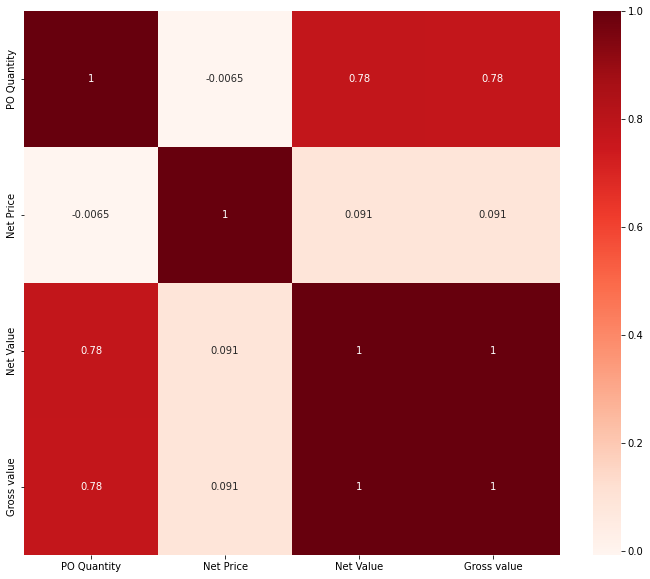

In [53]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, vmax = 1.0, vmin = -1.0 annot=True, cmap=plt.cm.Reds)
plt.show()